Adapting from my own notebook here : https://www.kaggle.com/fanbyprinciple/beginner-pytorch-notebook-on-housing-dataset
I feel I have forgotten stuff. This notebook was originally in part of the D2l book. https://d2l.ai/. Much recommended. Explanations of stuff taken from this book.

# LETS LOAD THE DATA

We use pandas to load the two csv files containing training and test data respectively.

In [1]:
import numpy
import pandas as pd
import torch
import torch.nn as nn

In [2]:
train_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

The training dataset includes 1460 examples, 80 features, and 1 label, while the test data contains 1459 examples and 80 features.

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.shape

(1460, 81)

How to look at top 4 rows for columns

In [5]:
train_data.iloc[0:4, [1,2,3,-1,-2]]

,MSSubClass,MSZoning,LotFrontage,SalePrice,SaleCondition
0,60,RL,65.0,208500,Normal
1,20,RL,80.0,181500,Normal
2,60,RL,68.0,223500,Normal
3,70,RL,60.0,140000,Abnorml


train data has one column more for labels

In [6]:
len(test_data.columns), len(train_data.columns)

(80, 81)

# DATA PREPROCESSING

since we are going to use both of train data and test data through the preprocessing we first concatenate it. We can see that in each example, (the first feature is the ID.) This helps the model identify each training example. While this is convenient, it does not carry any information for prediction purposes. Hence, (we remove it from the dataset) before feeding the data into the model.

In [7]:
all_features = pd.concat((train_data.iloc[:,1:-1], test_data.iloc[:,1:]))

# row wise concat

In [8]:
all_features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


### 1. NORMALISATION

Now lets look for numerical features, since we would want to normalise numerical features first.

In [9]:
all_features.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

We can use '==' on dataframes for comparison! here is how to find only numerical features.

In [10]:
all_features.dtypes[all_features.dtypes == 'int64']

MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
dtype: object

In [11]:
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [12]:
# numeric_features = all_features.dtypes[all_features.dtypes=='int64'].index

Notice the .index, it only returns the column name

In [13]:
def normalise(x):
    return ((x - x.mean())/x.std())

Applying normalisation. 

As stated above, we have a wide variety of data types. We will need to preprocess the data before we can start modeling. Let us start with the numerical features. First, we apply a heuristic, [replacing all missing values by the corresponding feature's mean.] Then, to put all features on a common scale, we (standardize the data by rescaling features to zero mean and unit variance):

$$x \leftarrow \frac{x - \mu}{\sigma},$$
where $\mu$ and $\sigma$ denote mean and standard deviation, respectively. To verify that this indeed transforms our feature (variable) such that it has zero mean and unit variance, note that $E[\frac{x-\mu}{\sigma}] = \frac{\mu - \mu}{\sigma} = 0$ and that $E[(x-\mu)^2] = (\sigma^2 + \mu^2) - 2\mu^2+\mu^2 = \sigma^2$. Intuitively, we standardize the data for two reasons. First, it proves convenient for optimization. Second, because we do not know a priori which features will be relevant, we do not want to penalize coefficients assigned to one feature more than on any other.

In [14]:
# If test data were inaccessible, mean and standard deviation could be
# calculated from training data

all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))


notice the difference in all_features before and after normalisation in `all_features[numeric_features]`

In [15]:
all_features[numeric_features]


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.067320,-0.184443,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.523038,0.580708,-0.29303,...,0.348780,-0.740634,0.199972,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,0.157619
1,-0.873466,0.458096,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.569893,1.177709,-0.29303,...,-0.059772,1.614603,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.446848,-0.602858
2,0.067320,-0.055935,0.137173,0.646073,-0.507197,0.980053,0.848819,0.333448,0.097840,-0.29303,...,0.627338,-0.740634,-0.081195,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,1.026577,0.157619
3,0.302516,-0.398622,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.569893,-0.494771,-0.29303,...,0.785188,-0.740634,-0.184783,3.874303,-0.103313,-0.285886,-0.063139,-0.089577,-1.551918,-1.363335
4,0.067320,0.629439,0.518814,1.355319,-0.507197,0.947040,0.753100,1.381770,0.468770,-0.29303,...,1.685860,0.776834,0.540332,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,2.131647,0.157619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.419286,-2.069222,-1.043758,-1.481667,1.289537,-0.043338,-0.682695,-0.569893,-0.968860,-0.29303,...,-2.195385,-0.740634,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.078492,-1.363335
1455,2.419286,-2.069222,-1.049083,-1.481667,-0.507197,-0.043338,-0.682695,-0.569893,-0.415757,-0.29303,...,-0.867591,-0.740634,-0.347564,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,-0.815205,-1.363335
1456,-0.873466,3.884968,1.246594,-0.772420,1.289537,-0.373465,0.561660,-0.569893,1.717643,-0.29303,...,0.478774,3.005615,-0.702722,-0.359539,-0.103313,-0.285886,-0.063139,-0.089577,1.026577,-1.363335
1457,0.655311,-0.312950,0.034599,-0.772420,-0.507197,0.682939,0.370221,-0.569893,-0.229194,-0.29303,...,-2.195385,-0.108355,-0.229178,-0.359539,-0.103313,-0.285886,-0.063139,1.144116,0.289865,-1.363335


### HANDLING MISSING ENTRIES

one of first jobs we have to do handlind datasets is to handle the missing values

In [16]:
all_features[numeric_features] = all_features[numeric_features].fillna(0)

### ONE HOT ENCODING

discrete features now need to be one hot encoded. The discrete columns are devided based on value, and 0 or 1 put in columns where the value is true, for example if `SaleType` had two discrete values other or WD, there would be two columns made `SaleType_other` and `Saletype_WD`

In [17]:
all_features = pd.get_dummies(all_features, dummy_na=True)

all_features


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,0.067320,-0.184443,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.523038,0.580708,-0.29303,...,0,1,0,0,0,0,0,1,0,0
1,-0.873466,0.458096,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.569893,1.177709,-0.29303,...,0,1,0,0,0,0,0,1,0,0
2,0.067320,-0.055935,0.137173,0.646073,-0.507197,0.980053,0.848819,0.333448,0.097840,-0.29303,...,0,1,0,0,0,0,0,1,0,0
3,0.302516,-0.398622,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.569893,-0.494771,-0.29303,...,0,1,0,1,0,0,0,0,0,0
4,0.067320,0.629439,0.518814,1.355319,-0.507197,0.947040,0.753100,1.381770,0.468770,-0.29303,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.419286,-2.069222,-1.043758,-1.481667,1.289537,-0.043338,-0.682695,-0.569893,-0.968860,-0.29303,...,0,1,0,0,0,0,0,1,0,0
1455,2.419286,-2.069222,-1.049083,-1.481667,-0.507197,-0.043338,-0.682695,-0.569893,-0.415757,-0.29303,...,0,1,0,1,0,0,0,0,0,0
1456,-0.873466,3.884968,1.246594,-0.772420,1.289537,-0.373465,0.561660,-0.569893,1.717643,-0.29303,...,0,1,0,1,0,0,0,0,0,0
1457,0.655311,-0.312950,0.034599,-0.772420,-0.507197,0.682939,0.370221,-0.569893,-0.229194,-0.29303,...,0,1,0,0,0,0,0,1,0,0


notice that now there are 331 columns instead of earlier 25. Data prerpocessing is now over.

### BIFURCATING TEST AND TRAIN DATA

Bifurcating data back to train and test data. And converting them into float32 torch tensor. Via the values attribute, we can [extract the NumPy format from the pandas format and convert it into the tensor] representation for training.

In [18]:
n_train = len(train_data)

train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float32)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float32)

train_labels = torch.tensor(train_data.iloc[:,-1].values, dtype=torch.float32)


Since its the beginning we will go for a proof of concept and try and train a simple sequential model.
Later we will change the definition of `get_net()`. To get started we train a linear model with squared loss. Not surprisingly, our linear model will not lead to a competition-winning submission but it provides a sanity check to see whether there is meaningful information in the data. If we cannot do better than random guessing here, then there might be a good chance that we have a data processing bug. And if things work, the linear model will serve as a baseline giving us some intuition about how close the simple model gets to the best reported models, giving us a sense of how much gain we should expect from fancier models.

In [19]:
loss = nn.MSELoss()

in_features = train_features.shape[1]
out_features = 1

def get_net():
#     net = nn.Sequential(nn.Linear(in_features,256), nn.ReLU(), nn.Linear(256,out_features))
    net = nn.Sequential(nn.Linear(in_features, out_features))
    return net

With house prices, as with stock prices, we care about relative quantities more than absolute quantities. Thus [we tend to care more about the relative error $\frac{y - \hat{y}}{y}$] than about the absolute error $y - \hat{y}$. For instance, if our prediction is off by USD 100,000 when estimating the price of a house in Rural Ohio, where the value of a typical house is 125,000 USD, then we are probably doing a horrible job. On the other hand, if we err by this amount in Los Altos Hills, California, this might represent a stunningly accurate prediction (there, the median house price exceeds 4 million USD).

(One way to address this problem is to measure the discrepancy in the logarithm of the price estimates.) In fact, this is also the official error measure used by the competition to evaluate the quality of submissions. After all, a small value $\delta$ for $|\log y - \log \hat{y}| \leq \delta$ translates into $e^{-\delta} \leq \frac{\hat{y}}{y} \leq e^\delta$. This leads to the following root-mean-squared-error between the logarithm of the predicted price and the logarithm of the label price:

$$\sqrt{\frac{1}{n}\sum_{i=1}^n\left(\log y_i -\log \hat{y}_i\right)^2}.$$

In [20]:
def log_rmse(net, features, labels):
    clipped_preds = torch.clamp(net(features), 1, float('inf'))
    rmse = torch.sqrt(loss(torch.log(clipped_preds), torch.log(labels)))
    return rmse.item()

In [21]:
def load_array(data_array, batch_size):
    in_dataset = torch.utils.data.TensorDataset(*data_array)
    in_dataloader = torch.utils.data.DataLoader(in_dataset, shuffle=True, batch_size=batch_size)
    return in_dataloader

In [22]:
def init_weights(m):
    if type(m)==nn.Linear or type(m)==nn.Conv2d:
        nn.init.xavier_uniform_(m.weight)

In [23]:
def accuracy(y_hat, y):
    return (torch.argmax(y_hat, dim=1)==y).sum().float().mean()

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [25]:
net = get_net()
net

Sequential(
  (0): Linear(in_features=331, out_features=1, bias=True)
)

In [26]:
test_labels = None
batch_size= 64
learning_rate = 0.03
lr = learning_rate
weight_decay = 0
num_epochs = 100

Looking inside train dataloader. 

In [27]:
train_dataloader = load_array((train_features, train_labels), batch_size)
with torch.no_grad():
    for X, y in train_dataloader:
        print(X.shape)
        print(X, "\n")
        print(len(y))
        print(y, "\n")
        y_hat = net(X)
        print(y_hat)
        
        print(accuracy(y_hat, y))
        #for x in X:  
        #    y_hat = net(x)
        #    print(x)
        #    print(y_hat)
        #    print(y_hat.shape)
        break

torch.Size([64, 331])
tensor([[ 0.0673,  0.4581, -0.1020,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.5377, -0.4415, -0.0737,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8735,  1.1435,  0.2886,  ...,  0.0000,  1.0000,  0.0000],
        ...,
        [-0.8735,  1.1006,  0.1865,  ...,  0.0000,  1.0000,  0.0000],
        [-0.8735,  0.0000,  5.9632,  ...,  1.0000,  0.0000,  0.0000],
        [-0.1679, -0.9127,  0.3365,  ...,  0.0000,  0.0000,  0.0000]]) 

64
tensor([158000., 190000., 394617., 190000., 274725., 105000., 180000., 275500.,
        197900., 176000.,  40000., 173733.,  81000., 167900., 184750., 138000.,
         85000., 118964., 148800., 214500.,  85500., 186500.,  96500., 236500.,
        142500., 228950., 180000., 149500.,  88000., 128500., 213000., 231500.,
        156000., 159500., 124500., 118400., 202500., 128200., 146000., 138000.,
        127000., 173000., 215000., 280000.,  60000., 100000., 151000., 160200.,
         82000., 147000., 625000., 392500., 326000., 120000

In [28]:
def train(net, train_features, train_labels, test_features, test_labels, num_epochs, learning_rate, weight_decay,batch_size):
    train_ls, test_ls = [], []
    
    net = net.to(device)
    net.apply(init_weights)
    
    train_acc = []
    
    
    optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate, weight_decay=weight_decay)
    
    train_dataloader = load_array((train_features, train_labels),batch_size)
    
    for epoch in range(num_epochs):
        curr_acc = 0
        numer = 0
        for X, y in train_dataloader:
            X = X.to(device)
            y = y.to(device)
            
            y_hat = net(X)
            
            l = loss(y_hat, y.unsqueeze(1))
            curr_acc += accuracy(y_hat, y)
            
#             print(y)
#             print(y_hat)
            
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            numer += len(y)
            
        train_ls.append(log_rmse(net, train_features, train_labels))
        train_acc.append(curr_acc/ numer)
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
        print(f'for epoch {epoch} rmse: {train_ls[-1]}, accuracy : {train_acc[-1]}')
    
    return train_ls, test_ls
            

In [29]:
net(train_features).detach()

tensor([[-0.1241],
        [ 0.4715],
        [-0.2877],
        ...,
        [-0.3085],
        [ 0.3974],
        [ 0.3725]])

In [30]:
#train_ls, test_ls =  train(net, train_features, train_labels, test_features, test_labels, num_epochs, learning_rate, weight_decay,batch_size)

In [31]:
!pip install -U d2l
import d2l
from d2l import torch
from d2l.torch import *

     |████████████████████████████████| 83 kB 586 kB/s 


In [32]:
def train_and_pred(train_features, test_feature, train_labels, test_data,
num_epochs, lr, weight_decay, batch_size):
    net = get_net()
    train_ls, _ = train(net, train_features, train_labels, None, None,
    num_epochs, lr, weight_decay, batch_size)
    d2l.plot(np.arange(1, num_epochs + 1), [train_ls], xlabel='epoch',
    ylabel='log rmse', xlim=[1, num_epochs], yscale='log')
    print(f'train log rmse {float(train_ls[-1]):f}')
    # Apply the network to the test set
    preds = net(test_features).detach().numpy()
    # Reformat it to export to Kaggle
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('submission.csv', index=False)

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1460])) that is different to the input size (torch.Size([1460, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


for epoch 0 rmse: 8.684109687805176, accuracy : 0.0
for epoch 1 rmse: 7.985859394073486, accuracy : 0.0
for epoch 2 rmse: 7.578336238861084, accuracy : 0.0
for epoch 3 rmse: 7.289859294891357, accuracy : 0.0
for epoch 4 rmse: 7.066528797149658, accuracy : 0.0
for epoch 5 rmse: 6.884781837463379, accuracy : 0.0
for epoch 6 rmse: 6.730523109436035, accuracy : 0.0
for epoch 7 rmse: 6.597089767456055, accuracy : 0.0
for epoch 8 rmse: 6.479416847229004, accuracy : 0.0
for epoch 9 rmse: 6.374157428741455, accuracy : 0.0
for epoch 10 rmse: 6.2791266441345215, accuracy : 0.0
for epoch 11 rmse: 6.192248344421387, accuracy : 0.0
for epoch 12 rmse: 6.112422466278076, accuracy : 0.0
for epoch 13 rmse: 6.038287162780762, accuracy : 0.0
for epoch 14 rmse: 5.969634056091309, accuracy : 0.0
for epoch 15 rmse: 5.905242919921875, accuracy : 0.0
for epoch 16 rmse: 5.844893455505371, accuracy : 0.0
for epoch 17 rmse: 5.7878313064575195, accuracy : 0.0
for epoch 18 rmse: 5.733890056610107, accuracy : 0.0
f

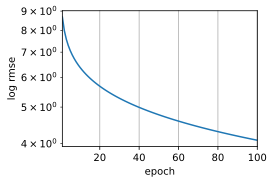

In [33]:
train_and_pred(train_features, test_features, train_labels, test_data,
num_epochs, lr, weight_decay, batch_size)


rmse of 4.08202 takes us to 4k rank in leaderboard. Lets try and use a different get_net function. Notice that accuracy is 0.0 because y_hat predicted is never actually equal to the test value y.

# IMPROVING OUR POSITION ON LEADERBOARD

implementation of densenet: mentioned in this model

https://arxiv.org/pdf/2108.00864.pdf

In [34]:
def get_net():
    net = nn.Sequential(nn.Linear(in_features, 256), nn.ReLU(), nn.Linear(256,out_features))
    return net

net = get_net()
net

Sequential(
  (0): Linear(in_features=331, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=1, bias=True)
)

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1460])) that is different to the input size (torch.Size([1460, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


for epoch 0 rmse: 3.9944863319396973, accuracy : 0.0
for epoch 1 rmse: 2.41595196723938, accuracy : 0.0
for epoch 2 rmse: 1.469759464263916, accuracy : 0.0
for epoch 3 rmse: 0.8602503538131714, accuracy : 0.0
for epoch 4 rmse: 0.5433042049407959, accuracy : 0.0
for epoch 5 rmse: 0.48320838809013367, accuracy : 0.0
for epoch 6 rmse: 0.5068061947822571, accuracy : 0.0
for epoch 7 rmse: 0.5309239625930786, accuracy : 0.0
for epoch 8 rmse: 0.5483787059783936, accuracy : 0.0
for epoch 9 rmse: 0.5583675503730774, accuracy : 0.0
for epoch 10 rmse: 0.5630121231079102, accuracy : 0.0
for epoch 11 rmse: 0.5682467818260193, accuracy : 0.0
for epoch 12 rmse: 0.5679429769515991, accuracy : 0.0
for epoch 13 rmse: 0.5678250789642334, accuracy : 0.0
for epoch 14 rmse: 0.5681701898574829, accuracy : 0.0
for epoch 15 rmse: 0.5685251355171204, accuracy : 0.0
for epoch 16 rmse: 0.5671851634979248, accuracy : 0.0
for epoch 17 rmse: 0.5661346912384033, accuracy : 0.0
for epoch 18 rmse: 0.5646287202835083, a

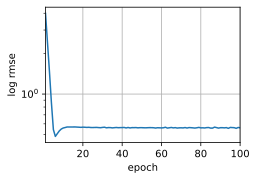

In [35]:
train_and_pred(train_features, test_features, train_labels, test_data,
num_epochs, lr, weight_decay, batch_size)

Now this takes you within earshot of 1k in leaderboard.

In [36]:
#would creating a more complex model help?

def get_net():
    net = nn.Sequential(nn.Linear(in_features, 256), nn.ReLU(),nn.Linear(256,64), nn.ReLU(), nn.Linear(64,out_features))
    return net

net = get_net()
net

Sequential(
  (0): Linear(in_features=331, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=1, bias=True)
)

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1460])) that is different to the input size (torch.Size([1460, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


for epoch 0 rmse: 0.8259661197662354, accuracy : 0.0
for epoch 1 rmse: 0.6430516242980957, accuracy : 0.0
for epoch 2 rmse: 0.5826812386512756, accuracy : 0.0
for epoch 3 rmse: 0.5470759868621826, accuracy : 0.0
for epoch 4 rmse: 0.5666559934616089, accuracy : 0.0
for epoch 5 rmse: 0.5503910183906555, accuracy : 0.0
for epoch 6 rmse: 0.5409213304519653, accuracy : 0.0
for epoch 7 rmse: 0.5563011765480042, accuracy : 0.0
for epoch 8 rmse: 0.5871105790138245, accuracy : 0.0
for epoch 9 rmse: 0.5468880534172058, accuracy : 0.0
for epoch 10 rmse: 0.5572117567062378, accuracy : 0.0
for epoch 11 rmse: 0.5567137002944946, accuracy : 0.0
for epoch 12 rmse: 0.558440089225769, accuracy : 0.0
for epoch 13 rmse: 0.5469509363174438, accuracy : 0.0
for epoch 14 rmse: 0.5589202642440796, accuracy : 0.0
for epoch 15 rmse: 0.5686090588569641, accuracy : 0.0
for epoch 16 rmse: 0.5483385324478149, accuracy : 0.0
for epoch 17 rmse: 0.5462485551834106, accuracy : 0.0
for epoch 18 rmse: 0.5504502654075623, 

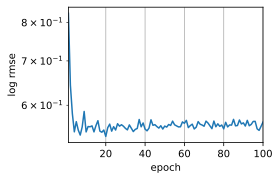

In [37]:
train_and_pred(train_features, test_features, train_labels, test_data,
num_epochs, lr, weight_decay, batch_size)